In [1]:
import pandas as pd
import torch
import numpy as np
train_df = pd.read_csv('train.csv')
HomePlanet = train_df['HomePlanet']
CryoSleep = train_df['CryoSleep']
Cabin =  train_df['Cabin']
Destination = train_df['Destination']
Ages = torch.tensor(train_df['Age'].values)
VIP = train_df['VIP']
RoomService = torch.tensor(train_df['RoomService'].values)
FoodCourt = torch.tensor(train_df['FoodCourt'].values)
ShoppingMall = torch.tensor(train_df['ShoppingMall'].values)
Spa = torch.tensor(train_df['Spa'].values)
VRDeck = torch.tensor(train_df['VRDeck'].values)
Transported = train_df['Transported']



In [2]:
Cabin = train_df['Cabin'].values.astype(str)
Cabin = np.where(np.char.equal(Cabin, 'nan'), 'Z/-1/N', Cabin)

split_cabin = np.char.split(Cabin, sep='/')

cabin_deck = np.array(split_cabin.tolist())[:, 0]
cabin_number = np.array(split_cabin.tolist())[:, 1]
cabin_side = np.array(split_cabin.tolist())[:, 2]


In [3]:
cabin_number = torch.FloatTensor(np.asarray(cabin_number, dtype=float))

HomePlanet, CryoSleep, Cabin, Destination, VIP are not a tensors

In [4]:
#replace unnown values with median. I think it is best way to fill missing data for age
Agemedian = torch.median(Ages[~torch.isnan(Ages)])

# Replace the NaNs with the median value
Ages = torch.where(torch.isnan(Ages), Agemedian, Ages)


In [5]:
cabin_deckID = []
cabin_deckS = list(set(cabin_deck))
cabin_deck_stoi = {s:i+1 for i,s in enumerate(cabin_deckS)}
for i in cabin_deck:
    cabin_deckID.append(cabin_deck_stoi[i])
cabin_deckID = torch.FloatTensor(cabin_deckID)


In [6]:
cabin_sideID = []
cabin_sideS = list(set(cabin_side))
cabin_side_stoi = {s:i+1 for i,s in enumerate(cabin_sideS)}
for i in cabin_side:
    cabin_sideID.append(cabin_side_stoi[i])
cabin_sideID = torch.FloatTensor(cabin_sideID)


In [7]:
#here I think it's better to fill by zeroes
RoomService = torch.where(torch.isnan(RoomService), 0, RoomService)
FoodCourt = torch.where(torch.isnan(FoodCourt), 0, FoodCourt)
ShoppingMall = torch.where(torch.isnan(ShoppingMall), 0, ShoppingMall)
Spa = torch.where(torch.isnan(Spa), 0, Spa)
VRDeck = torch.where(torch.isnan(VRDeck), 0, VRDeck)

In [8]:
true_mask = CryoSleep == True
false_mask = CryoSleep == False
nan_mask = CryoSleep.isna()

# Create new Series with 1 and 0 values based on the masks
CryoSleepTrue = pd.Series(np.where(true_mask, 1, 0), index=CryoSleep.index)
CryoSleepFalse = pd.Series(np.where(false_mask, 1, 0), index=CryoSleep.index)
CryoSleepNaN = pd.Series(np.where(nan_mask, 1, 0), index=CryoSleep.index)

CryoSleepTrue = torch.tensor(CryoSleepTrue)
CryoSleepFalse = torch.tensor(CryoSleepFalse)
CryoSleepNaN = torch.tensor(CryoSleepNaN)


In [9]:
TransportedTrueMask = Transported == True
Transported = pd.Series(np.where(TransportedTrueMask, 1, 0), index=Transported.index)
Transported = torch.tensor(Transported).float()

In [10]:
HomePlanetID = []
HomePlanetS = list(set(HomePlanet))
HomePlanet_stoi = {s:i+1 for i,s in enumerate(HomePlanetS)}
for i in HomePlanet:
    HomePlanetID.append(HomePlanet_stoi[i])
HomePlanetID = torch.FloatTensor(HomePlanetID)


In [11]:
DestinationID = []
DestinationS = list(set(Destination))
Destination_stoi = {s:i+1 for i,s in enumerate(DestinationS)}
for i in Destination:
    DestinationID.append(Destination_stoi[i])
DestinationID = torch.FloatTensor(DestinationID)


In [12]:
true_mask = VIP == True
false_mask = VIP == False
nan_mask = VIP.isna()

# Create new Series with 1 and 0 values based on the masks
VIPTrue = pd.Series(np.where(true_mask, 1, 0), index=VIP.index)
VIPFalse = pd.Series(np.where(false_mask, 1, 0), index=VIP.index)
VIPNaN = pd.Series(np.where(nan_mask, 1, 0), index=VIP.index)


VIPTrue = torch.tensor(VIPTrue)
VIPFalse = torch.tensor(VIPFalse)
VIPNaN = torch.tensor(VIPNaN)


In [13]:
train_data = torch.cat((HomePlanetID.unsqueeze(1), DestinationID.unsqueeze(1),
                        CryoSleepTrue.unsqueeze(1), CryoSleepFalse.unsqueeze(1),  CryoSleepNaN.unsqueeze(1),
                        VIPTrue.unsqueeze(1), VIPFalse.unsqueeze(1), VIPNaN.unsqueeze(1),
                        Ages.unsqueeze(1), RoomService.unsqueeze(1), FoodCourt.unsqueeze(1), ShoppingMall.unsqueeze(1),
                        Spa.unsqueeze(1), VRDeck.unsqueeze(1),
                        cabin_deckID.unsqueeze(1) ,cabin_number.unsqueeze(1) , cabin_sideID.unsqueeze(1)
                           ), dim=1)

train_data = train_data.float()
print(train_data.dtype)
print(train_data.shape, train_data.dtype)
print(Transported.shape, Transported.dtype)


torch.float32
torch.Size([8693, 17]) torch.float32
torch.Size([8693]) torch.float32


In [14]:
# Shuffle the data and labels
indices = np.random.permutation(len(train_data))

train_data = train_data[indices]
Transported = Transported[indices]

# Define the percentage of data to be used for validation
val_percent = 0.2

# Calculate the number of validation samples
val_size = int(len(train_data) * val_percent)

# Split the data and labels into training and validation sets
val_data = train_data[:val_size]
train_data = train_data[val_size:]

val_Transported = Transported[:val_size]
train_Transported = Transported[val_size:]

print(val_data.shape)
print(val_Transported.shape)
print(train_data.shape)
print(train_Transported.shape)

torch.Size([1738, 17])
torch.Size([1738])
torch.Size([6955, 17])
torch.Size([6955])


In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [30]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

class Titanic(nn.Module):
    def __init__(self):
        super(Titanic, self).__init__()
        self.fc1 = nn.Linear(17, 48) 
        self.fc2 = nn.Linear(48, 64)
        self.fc3 = nn.Linear(64, 96)
        self.fc4 = nn.Linear(96, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 16)
        self.fc7 = nn.Linear(16, 1)#, bias=False)
        self.Leaky_ReLu = nn.LeakyReLU()
        self.relu = nn.ReLU()
        self.Sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.Sigmoid(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.leaky_relu(x)
        x = self.fc5(x)
        x = F.leaky_relu(x)
        x = self.fc6(x)
        x = F.leaky_relu(x)
        x = self.fc7(x)
        x = self.Sigmoid(x)
        return x
    
# Instantiate the neural network
model = Titanic()
print(model)

Titanic(
  (fc1): Linear(in_features=17, out_features=48, bias=True)
  (fc2): Linear(in_features=48, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=96, bias=True)
  (fc4): Linear(in_features=96, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=32, bias=True)
  (fc6): Linear(in_features=32, out_features=16, bias=True)
  (fc7): Linear(in_features=16, out_features=1, bias=True)
  (Leaky_ReLu): LeakyReLU(negative_slope=0.01)
  (relu): ReLU()
  (Sigmoid): Sigmoid()
)


In [31]:
from torch.utils.data import TensorDataset, DataLoader
# Define the loss function and optimizer
criterion = torch.nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Convert the data and labels to PyTorch datasets
train_dataset = TensorDataset(train_data, train_Transported)
val_dataset = TensorDataset(val_data, val_Transported)
# Define batch size for training and validation dataloaders
batch_size = 50
# Create data loaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,num_workers=10)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,num_workers=10)
save_every = 1
train_iterations = 250


In [32]:
running_loss_es = []

In [33]:
import math
def train():
    for epoch in range(train_iterations):
        running_loss = 0.0
        losses = []
        for i, (inputs, labels) in enumerate(train_loader):
            print (f'Training epoch {epoch}/{train_iterations} iteration {i}/{len(train_loader)}', end = '\r'),
            optimizer.zero_grad()
            outputs = model(inputs)
            labels = labels.squeeze(-1)
            outputs = outputs.squeeze(-1)
            loss = criterion(outputs, labels)
            losses.append(loss)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'\nEpoch {epoch} loss: {running_loss/len(train_loader)}')
        #print(f'Max loss = {max(losses)} min loss {min(losses)}')
        running_loss_es.append(running_loss/len(train_loader))
        if (epoch % save_every == 0):
            model_file_name = f'weights/model_weights_{epoch}.pth'
            print(f'Saving model as {model_file_name}')
            torch.save(model, model_file_name)
        torch.save(model, f'weights/model_weights_{train_iterations}.pth')
train()
print("Done")

Training epoch 0/250 iteration 139/140
Epoch 0 loss: 0.5608104526996612
Saving model as weights/model_weights_0.pth
Training epoch 1/250 iteration 139/140
Epoch 1 loss: 0.4928767719439098
Saving model as weights/model_weights_1.pth
Training epoch 2/250 iteration 139/140
Epoch 2 loss: 0.48829776027372906
Saving model as weights/model_weights_2.pth
Training epoch 3/250 iteration 139/140
Epoch 3 loss: 0.4816523566842079
Saving model as weights/model_weights_3.pth
Training epoch 4/250 iteration 139/140
Epoch 4 loss: 0.48070273186479295
Saving model as weights/model_weights_4.pth
Training epoch 5/250 iteration 139/140
Epoch 5 loss: 0.4754268180046763
Saving model as weights/model_weights_5.pth
Training epoch 6/250 iteration 139/140
Epoch 6 loss: 0.4771274839128767
Saving model as weights/model_weights_6.pth
Training epoch 7/250 iteration 139/140
Epoch 7 loss: 0.4736565121582576
Saving model as weights/model_weights_7.pth
Training epoch 8/250 iteration 139/140
Epoch 8 loss: 0.469349388512117

Training epoch 69/250 iteration 139/140
Epoch 69 loss: 0.4255064361861774
Saving model as weights/model_weights_69.pth
Training epoch 70/250 iteration 139/140
Epoch 70 loss: 0.4237438630844865
Saving model as weights/model_weights_70.pth
Training epoch 71/250 iteration 139/140
Epoch 71 loss: 0.42203444944960733
Saving model as weights/model_weights_71.pth
Training epoch 72/250 iteration 139/140
Epoch 72 loss: 0.4238011217543057
Saving model as weights/model_weights_72.pth
Training epoch 73/250 iteration 139/140
Epoch 73 loss: 0.4169112046382257
Saving model as weights/model_weights_73.pth
Training epoch 74/250 iteration 139/140
Epoch 74 loss: 0.41895964997155327
Saving model as weights/model_weights_74.pth
Training epoch 75/250 iteration 139/140
Epoch 75 loss: 0.4243509475673948
Saving model as weights/model_weights_75.pth
Training epoch 76/250 iteration 139/140
Epoch 76 loss: 0.4171501137316227
Saving model as weights/model_weights_76.pth
Training epoch 77/250 iteration 139/140
Epoch 

Training epoch 137/250 iteration 139/140
Epoch 137 loss: 0.40278722590633803
Saving model as weights/model_weights_137.pth
Training epoch 138/250 iteration 139/140
Epoch 138 loss: 0.3925025162952287
Saving model as weights/model_weights_138.pth
Training epoch 139/250 iteration 139/140
Epoch 139 loss: 0.3985087808753763
Saving model as weights/model_weights_139.pth
Training epoch 140/250 iteration 139/140
Epoch 140 loss: 0.39038696235844067
Saving model as weights/model_weights_140.pth
Training epoch 141/250 iteration 139/140
Epoch 141 loss: 0.3895730110151427
Saving model as weights/model_weights_141.pth
Training epoch 142/250 iteration 139/140
Epoch 142 loss: 0.3931954122015408
Saving model as weights/model_weights_142.pth
Training epoch 143/250 iteration 139/140
Epoch 143 loss: 0.398652891601835
Saving model as weights/model_weights_143.pth
Training epoch 144/250 iteration 139/140
Epoch 144 loss: 0.39880114680688294
Saving model as weights/model_weights_144.pth
Training epoch 145/250

Training epoch 204/250 iteration 139/140
Epoch 204 loss: 0.37163233682513236
Saving model as weights/model_weights_204.pth
Training epoch 205/250 iteration 139/140
Epoch 205 loss: 0.3720551904823099
Saving model as weights/model_weights_205.pth
Training epoch 206/250 iteration 139/140
Epoch 206 loss: 0.3711611003748008
Saving model as weights/model_weights_206.pth
Training epoch 207/250 iteration 139/140
Epoch 207 loss: 0.3706848740577698
Saving model as weights/model_weights_207.pth
Training epoch 208/250 iteration 139/140
Epoch 208 loss: 0.3694303568984781
Saving model as weights/model_weights_208.pth
Training epoch 209/250 iteration 139/140
Epoch 209 loss: 0.36870440712996894
Saving model as weights/model_weights_209.pth
Training epoch 210/250 iteration 139/140
Epoch 210 loss: 0.367914597264358
Saving model as weights/model_weights_210.pth
Training epoch 211/250 iteration 139/140
Epoch 211 loss: 0.370225841658456
Saving model as weights/model_weights_211.pth
Training epoch 212/250 i

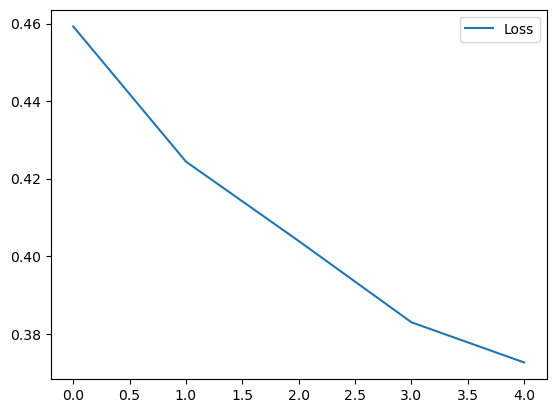

In [34]:
import matplotlib.pyplot as plt 
plt.plot(torch.tensor(running_loss_es).view(-1, 50).mean(1), label = "Loss")
plt.legend()

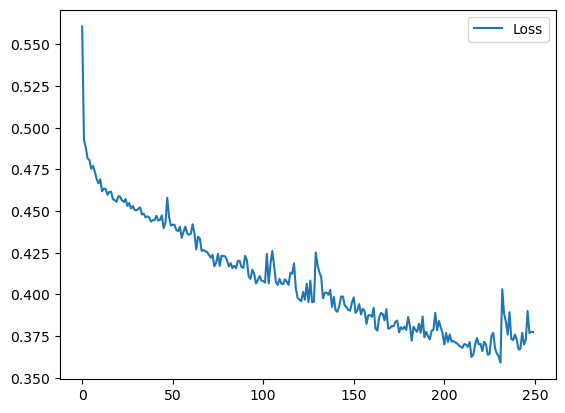

In [35]:
import matplotlib.pyplot as plt # for making figures
plt.plot(running_loss_es, label = "Loss")
plt.legend()

In [36]:
def evaluate(model_file, val_loader):
    # Load the neural network from file
    model = torch.load(model_file)
    print('Testing model ' + model_file)
    total_loss = 0
    total_correct = 0
    total_wrong = 0
    with torch.no_grad():
        # Loop over the validation set
        for batch_data, batch_labels in val_loader:
            # Move the data and labels to the device
            batch_data = batch_data.to(device)
            batch_labels = batch_labels.to(device)
            # Forward pass
            outputs = model(batch_data)
            outputs = outputs.squeeze(-1)
            # Calculate the loss
            loss = criterion(outputs, batch_labels)
            total_loss += loss.item()
            for i in range (len(batch_labels)):
                if (outputs[i] > 0.6):
                    tmp = 1
                else:
                    tmp = 0
                if (tmp == batch_labels[i]):
                    total_correct = total_correct + 1
                else:
                    total_wrong = total_wrong+1
# Calculate the average loss and accuracy over the validation set
    average_loss = total_loss / len(val_loader)
    accuracy = total_correct / (total_correct + total_wrong)
# Print the results
    print('Validation Loss: {:.4f}'.format(average_loss))
    print(f'Accuracy = {accuracy}')
    return average_loss, accuracy

In [37]:
val_loss = []
accuracy_per_generation = []
MinLoss = 100
maxAccuracy = 0
iterationWithMinLoss = 0
iterationWithMaxAccuracy = 0
for i in range(train_iterations):
    if (i % save_every == 0):
        loss, a = evaluate(f'weights/model_weights_{i}.pth',val_loader)
        val_loss.append(loss)
        accuracy_per_generation.append(a)
        if (loss < MinLoss):
            MinLoss = loss
            iterationWithMinLoss = i
        if(a>maxAccuracy):
            maxAccuracy = a
            iterationWithMaxAccuracy = i

Testing model weights/model_weights_0.pth
Validation Loss: 0.4984
Accuracy = 0.7796317606444189
Testing model weights/model_weights_1.pth
Validation Loss: 0.4961
Accuracy = 0.7848101265822784
Testing model weights/model_weights_2.pth
Validation Loss: 0.4942
Accuracy = 0.7888377445339471
Testing model weights/model_weights_3.pth
Validation Loss: 0.4894
Accuracy = 0.7888377445339471
Testing model weights/model_weights_4.pth
Validation Loss: 0.4932
Accuracy = 0.784234752589183
Testing model weights/model_weights_5.pth
Validation Loss: 0.4828
Accuracy = 0.7917146144994246
Testing model weights/model_weights_6.pth
Validation Loss: 0.4853
Accuracy = 0.7727272727272727
Testing model weights/model_weights_7.pth
Validation Loss: 0.4809
Accuracy = 0.7767548906789413
Testing model weights/model_weights_8.pth
Validation Loss: 0.4840
Accuracy = 0.7882623705408516
Testing model weights/model_weights_9.pth
Validation Loss: 0.4837
Accuracy = 0.784234752589183
Testing model weights/model_weights_10.pth

Validation Loss: 0.4428
Accuracy = 0.7871116225546605
Testing model weights/model_weights_86.pth
Validation Loss: 0.4487
Accuracy = 0.7859608745684695
Testing model weights/model_weights_87.pth
Validation Loss: 0.4445
Accuracy = 0.7963176064441887
Testing model weights/model_weights_88.pth
Validation Loss: 0.4579
Accuracy = 0.7991944764096662
Testing model weights/model_weights_89.pth
Validation Loss: 0.4472
Accuracy = 0.783084004602992
Testing model weights/model_weights_90.pth
Validation Loss: 0.4507
Accuracy = 0.7882623705408516
Testing model weights/model_weights_91.pth
Validation Loss: 0.4548
Accuracy = 0.766398158803222
Testing model weights/model_weights_92.pth
Validation Loss: 0.4469
Accuracy = 0.7738780207134638
Testing model weights/model_weights_93.pth
Validation Loss: 0.4516
Accuracy = 0.7888377445339471
Testing model weights/model_weights_94.pth
Validation Loss: 0.4483
Accuracy = 0.7888377445339471
Testing model weights/model_weights_95.pth
Validation Loss: 0.4526
Accuracy

Validation Loss: 0.4653
Accuracy = 0.7876869965477561
Testing model weights/model_weights_170.pth
Validation Loss: 0.4755
Accuracy = 0.7848101265822784
Testing model weights/model_weights_171.pth
Validation Loss: 0.4714
Accuracy = 0.7796317606444189
Testing model weights/model_weights_172.pth
Validation Loss: 0.4846
Accuracy = 0.7859608745684695
Testing model weights/model_weights_173.pth
Validation Loss: 0.4706
Accuracy = 0.7882623705408516
Testing model weights/model_weights_174.pth
Validation Loss: 0.4704
Accuracy = 0.7945914844649021
Testing model weights/model_weights_175.pth
Validation Loss: 0.4809
Accuracy = 0.7905638665132336
Testing model weights/model_weights_176.pth
Validation Loss: 0.4850
Accuracy = 0.7876869965477561
Testing model weights/model_weights_177.pth
Validation Loss: 0.4790
Accuracy = 0.783084004602992
Testing model weights/model_weights_178.pth
Validation Loss: 0.4667
Accuracy = 0.785385500575374
Testing model weights/model_weights_179.pth
Validation Loss: 0.500

In [38]:
iterationWithMinLoss

103

In [39]:
iterationWithMaxAccuracy

102

In [40]:
maxAccuracy

0.8009205983889528

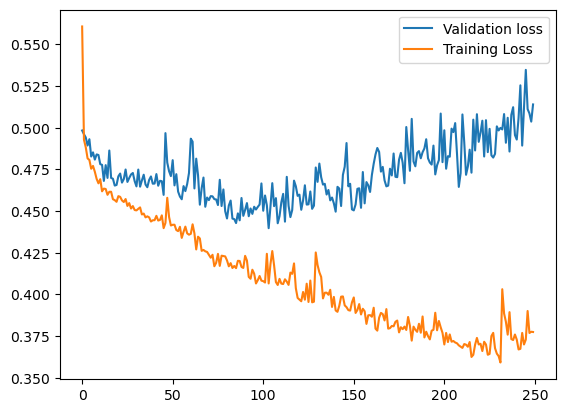

In [62]:
plt.plot(val_loss, label = "Validation loss")
plt.plot(running_loss_es, label = "Training Loss")
plt.legend()

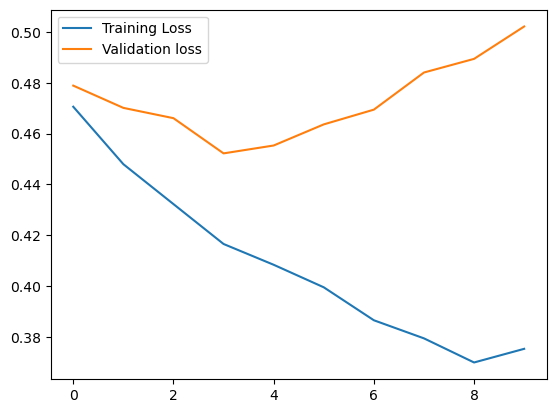

In [66]:
plt.plot(torch.tensor(running_loss_es).view(-1, 25).mean(1), label = "Training Loss")
plt.plot(torch.tensor(val_loss).view(-1, 25).mean(1), label = "Validation loss")

plt.legend()

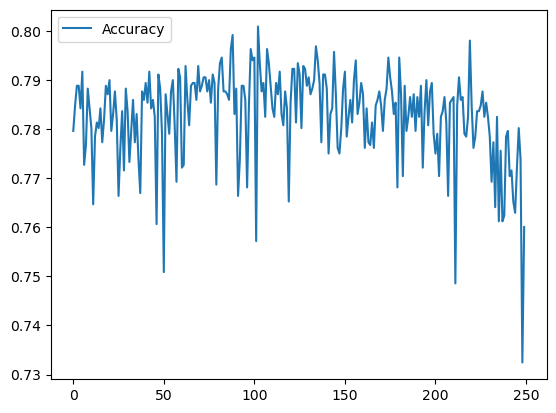

In [44]:
plt.plot(torch.tensor(accuracy_per_generation).view(-1, 1).mean(1), label = "Accuracy")
plt.legend()

Testing

In [45]:
model = torch.load('weights/model_weights_102.pth')

In [46]:
# read the test.csv file
test_df = pd.read_csv('test.csv')
test_HomePlanet = test_df['HomePlanet']
test_CryoSleep = test_df['CryoSleep']
test_Cabin =  test_df['Cabin']
test_Destination = test_df['Destination']
test_Ages = torch.tensor(test_df['Age'].values)
test_VIP = test_df['VIP']
test_RoomService = torch.tensor(test_df['RoomService'].values)
test_FoodCourt = torch.tensor(test_df['FoodCourt'].values)
test_ShoppingMall = torch.tensor(test_df['ShoppingMall'].values)
test_Spa = torch.tensor(test_df['Spa'].values)
test_VRDeck = torch.tensor(test_df['VRDeck'].values)




In [47]:
test_Cabin = test_df['Cabin'].values.astype(str)
test_Cabin = np.where(np.char.equal(test_Cabin, 'nan'), 'Z/-1/N', test_Cabin)

test_split_cabin = np.char.split(test_Cabin, sep='/')

test_cabin_deck = np.array(test_split_cabin.tolist())[:, 0]
test_cabin_number = np.array(test_split_cabin.tolist())[:, 1]
test_cabin_side = np.array(test_split_cabin.tolist())[:, 2]
test_cabin_number = torch.FloatTensor(np.asarray(test_cabin_number, dtype=float))

In [48]:
#replace unnown values with median. I think it is best way to fill missing data for age

# Replace the NaNs with the median value
test_Ages = torch.where(torch.isnan(test_Ages), Agemedian, test_Ages)


In [49]:
test_cabin_deckID = []
for i in test_cabin_deck:
    test_cabin_deckID.append(cabin_deck_stoi[i])
test_cabin_deckID = torch.FloatTensor(test_cabin_deckID)


In [50]:
test_cabin_sideID = []
for i in test_cabin_side:
    test_cabin_sideID.append(cabin_side_stoi[i])
test_cabin_sideID = torch.FloatTensor(test_cabin_sideID)


In [51]:
#here I think it's better to fill by zeroes
test_RoomService = torch.where(torch.isnan(test_RoomService), 0, test_RoomService)
test_FoodCourt = torch.where(torch.isnan(test_FoodCourt), 0, test_FoodCourt)
test_ShoppingMall = torch.where(torch.isnan(test_ShoppingMall), 0, test_ShoppingMall)
test_Spa = torch.where(torch.isnan(test_Spa), 0, test_Spa)
test_VRDeck = torch.where(torch.isnan(test_VRDeck), 0, test_VRDeck)

In [52]:
true_mask = test_CryoSleep == True
false_mask = test_CryoSleep == False
nan_mask = test_CryoSleep.isna()

# Create new Series with 1 and 0 values based on the masks
test_CryoSleepTrue = pd.Series(np.where(true_mask, 1, 0), index=test_CryoSleep.index)
test_CryoSleepFalse = pd.Series(np.where(false_mask, 1, 0), index=test_CryoSleep.index)
test_CryoSleepNaN = pd.Series(np.where(nan_mask, 1, 0), index=test_CryoSleep.index)

test_CryoSleepTrue = torch.tensor(test_CryoSleepTrue)
test_CryoSleepFalse = torch.tensor(test_CryoSleepFalse)
test_CryoSleepNaN = torch.tensor(test_CryoSleepNaN)


In [53]:
test_HomePlanetID = []
for i in test_HomePlanet:
    test_HomePlanetID.append(HomePlanet_stoi[i])
test_HomePlanetID = torch.FloatTensor(test_HomePlanetID)


In [54]:
test_DestinationID = []
for i in test_Destination:
    test_DestinationID.append(Destination_stoi[i])
test_DestinationID = torch.FloatTensor(test_DestinationID)


In [55]:
true_mask = test_VIP == True
false_mask = test_VIP == False
nan_mask = test_VIP.isna()

# Create new Series with 1 and 0 values based on the masks
test_VIPTrue = pd.Series(np.where(true_mask, 1, 0), index=test_VIP.index)
test_VIPFalse = pd.Series(np.where(false_mask, 1, 0), index=test_VIP.index)
test_VIPNaN = pd.Series(np.where(nan_mask, 1, 0), index=test_VIP.index)


test_VIPTrue = torch.tensor(test_VIPTrue)
test_VIPFalse = torch.tensor(test_VIPFalse)
test_VIPNaN = torch.tensor(test_VIPNaN)


In [56]:
print(test_HomePlanetID.shape)
print(test_DestinationID.shape)
print(test_CryoSleepTrue.shape)
print(test_CryoSleepFalse.shape)
print(test_CryoSleepNaN.shape)
print(test_VIPTrue.shape)
print(test_VIPFalse.shape)
print(test_VIPNaN.shape)
print(test_Ages.shape)
print(test_RoomService.shape)
print(test_FoodCourt.shape)
print(test_ShoppingMall.shape)
print(test_Spa.shape)
print(test_VRDeck.shape)
print(test_cabin_deckID.shape)
print(test_cabin_number.shape)
print(test_cabin_sideID.shape)

torch.Size([4277])
torch.Size([4277])
torch.Size([4277])
torch.Size([4277])
torch.Size([4277])
torch.Size([4277])
torch.Size([4277])
torch.Size([4277])
torch.Size([4277])
torch.Size([4277])
torch.Size([4277])
torch.Size([4277])
torch.Size([4277])
torch.Size([4277])
torch.Size([4277])
torch.Size([4277])
torch.Size([4277])


In [57]:
test_data = torch.cat((test_HomePlanetID.unsqueeze(1), test_DestinationID.unsqueeze(1),
                        test_CryoSleepTrue.unsqueeze(1), test_CryoSleepFalse.unsqueeze(1),  test_CryoSleepNaN.unsqueeze(1),
                        test_VIPTrue.unsqueeze(1), test_VIPFalse.unsqueeze(1), test_VIPNaN.unsqueeze(1),
                        test_Ages.unsqueeze(1), test_RoomService.unsqueeze(1), test_FoodCourt.unsqueeze(1), test_ShoppingMall.unsqueeze(1),
                        test_Spa.unsqueeze(1), test_VRDeck.unsqueeze(1),
                        test_cabin_deckID.unsqueeze(1) ,test_cabin_number.unsqueeze(1) , test_cabin_sideID.unsqueeze(1)
                           ), dim=1)

test_data = test_data.float()
print(test_data.dtype)
print(test_data.shape, test_data.dtype)


torch.float32
torch.Size([4277, 17]) torch.float32


In [58]:
all_predictions = []
submission_loader = DataLoader(test_data, batch_size=1, shuffle=False,num_workers=8)
with torch.no_grad():
    for i, (inputs) in enumerate(submission_loader):
        output = model(inputs)
        #_,predicted = torch.max(outputs.data, 1)
        all_predictions.append(output.item())
        #all_predictions.extend(predicted.numpy())
# Save the predictions to a new CSV file
test_PassengerId = test_df['PassengerId']
binaryPredictions = []
for i in all_predictions:
    if i > 0.5:
        binaryPredictions.append('True')
    else:
        binaryPredictions.append('False')
df = pd.DataFrame({'PassengerId': test_PassengerId, 'Transported': binaryPredictions})
df.to_csv('My_model_predictions.csv', index=False)

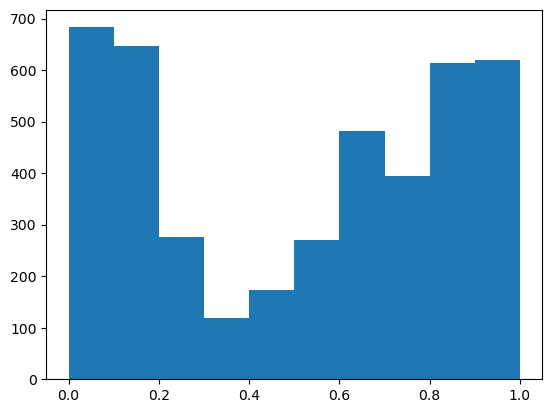

In [60]:
plt.hist(all_predictions)
plt.show()


On validations on kaggle it gives ~0.79 accuracy